# $HomeWork-4$
# Course Name :- Time Series Analysis [ MTH333 ]
# Instrunctor :- Dr. Saurav Trivedi

## Author Name :- Nishant Kumar [ 1904123 ]

# Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astsadata as astsa

c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarni

In [2]:
jj = pd.DataFrame(astsa.jj)
jj.head()

,value
index,
1960Q1,0.71
1960Q2,0.63
1960Q3,0.85
1960Q4,0.44
1961Q1,0.61


In [3]:
# Added another column called quaters from teh index itself to ease up the process
jj['quarters'] = jj.index.astype(str)

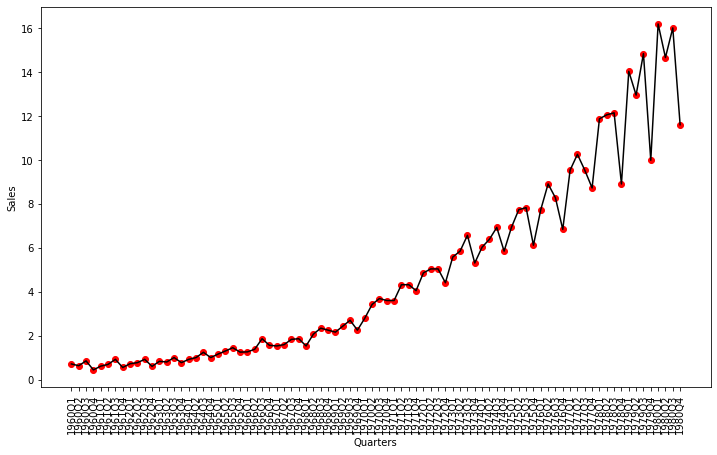

In [4]:
# Plotting the data, y-axis provides with the Quaters, While Y axis gives a measure of sales in that quarter
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
plt.xlabel('Quarters')
plt.ylabel('Sales')
plt.plot(jj['quarters'],jj['value'],color = 'black')    # FOr the plot lines
plt.scatter(jj['quarters'],jj['value'],color='red') # For the red scattered Dots

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
adf = adfuller(jj['value'])

In [7]:
print("ADF Statistic: ", adf[0])  
print("Critical Values: ",adf[4])  

# Ambiguity still there with the Rejection of Hypothesis based on comparision

ADF Statistic:  2.742016573457472
Critical Values:  {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}


### A[0] is greater than all the values in A[4], then the null hypothesis is rejected. And hence the time series is not stationary.

### Now, Taking log and differencing

In [8]:
jjdiff = np.log(jj["value"]).diff(1)[1:]
jjdiff

index
1960Q2   -0.119545
1960Q3    0.299517
1960Q4   -0.658462
1961Q1    0.326684
1961Q2    0.123233
            ...   
1979Q4   -0.396415
1980Q1    0.483427
1980Q2   -0.099207
1980Q3    0.088033
1980Q4   -0.321971
Freq: Q-DEC, Name: value, Length: 83, dtype: float64

### Stationarity Test ( Ad Fuller Test )

In [9]:
adf = adfuller(jjdiff)
print("ADF Statistic: ", adf[0])  
print("Critical Values: ", adf[4]) 

ADF Statistic:  -4.317043945811839
Critical Values:  {'1%': -3.518281134660583, '5%': -2.899878185191432, '10%': -2.5872229937594873}


## A0 is smaller than all the values in A4, which suggests that we cannot reject null hypothesis and the timeseries is stationary.

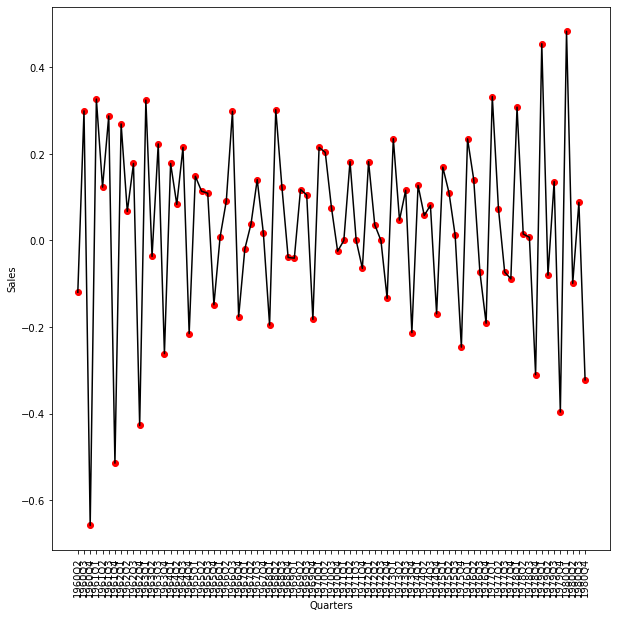

In [10]:
# Plotting the data, y-axis provides with the Quaters, While Y axis gives a measure of sales in that quarter
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
plt.xlabel('Quarters')
plt.ylabel('Sales')
plt.plot(jj['quarters'][1:], jjdiff, color = 'black')    # FOr the plot lines
plt.scatter(jj['quarters'][1:], jjdiff, color ='red')    # For the red scattered Dots

In [59]:
# Plot acf and pacf for milk production data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_and_pacf(data):
    lags = 50
    plt.figure(figsize=(12,7))
    plt.title('ACF of Milt Production Data ')
    plot_acf(data, ax=plt.gca(), lags = 25)
    
    plt.figure(figsize=(12,7))
    plt.title('PACF of Milt Production Data')    
    plot_pacf(data, ax=plt.gca(), method='ywm', lags = 25) 

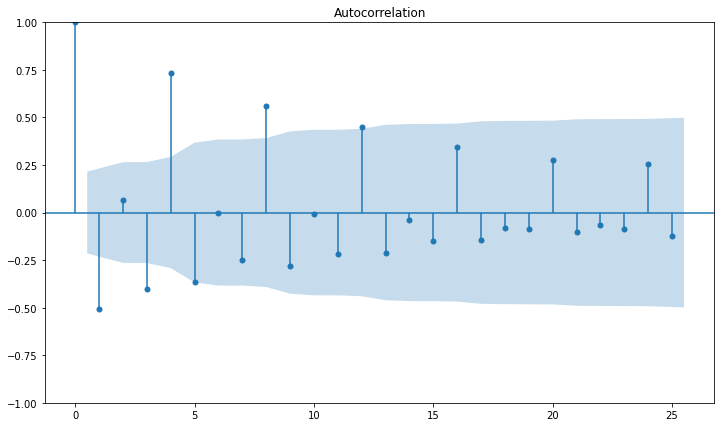

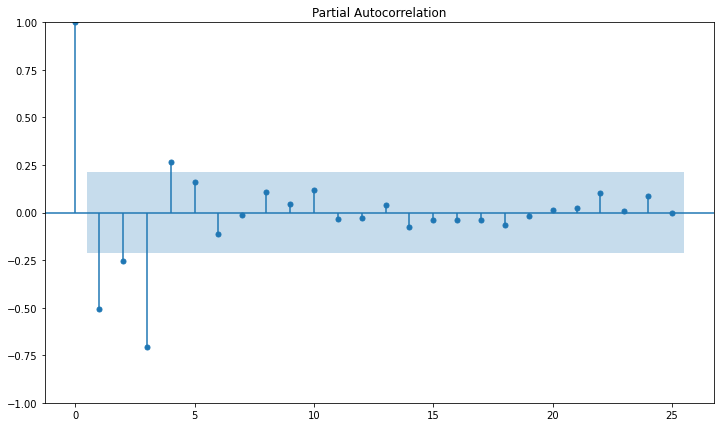

In [60]:
plot_acf_and_pacf(jjdiff)

*****************************************************************************************************************************

*******************************************************************************************************************************

*******************************************************************************************************************************

*******************************************************************************************************************************

# Q2.

In [25]:
import pandas as pd
df = pd.read_csv("milkproduction.csv")
df.head()

,Month,Pounds
0,1962-01,578.3
1,1962-02,609.8
2,1962-03,628.4
3,1962-04,665.6
4,1962-05,713.8


## Ploting original timeseries.

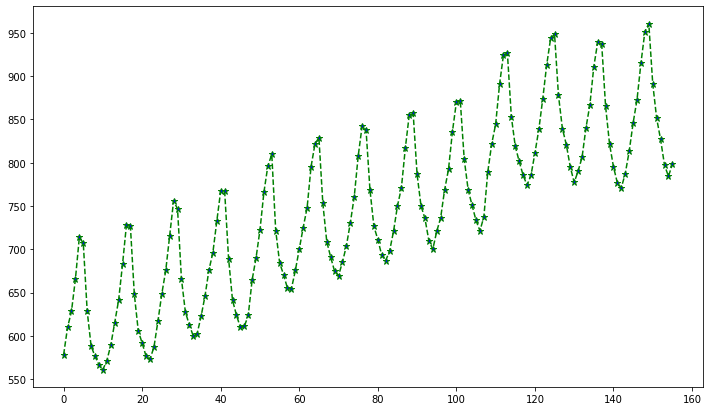

In [26]:
plt.figure(figsize=(12, 7))
plt.plot(df["Pounds"], color='green', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=7)

### Ploting Seasonal, Trend and Residual of the timeseries.

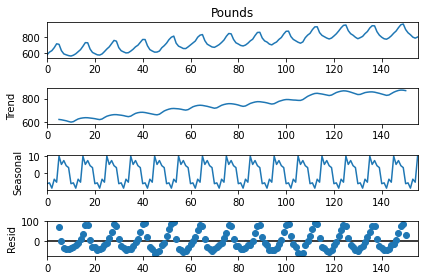

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df["Pounds"], model='additive', period=10).plot()

### On ploting the Seasonal, Trend and Residual, The plot itself shows us that we have a 'seasonal' component in our time series, which means we need to choose p,d,q for ARIMA and P,D,Q for SARIMA.

## Stationarity Test ( Ad Fuller Test )

In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window = 8, center = False).mean()
    rolstd =  timeseries.rolling(window = 8, center = False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 7))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

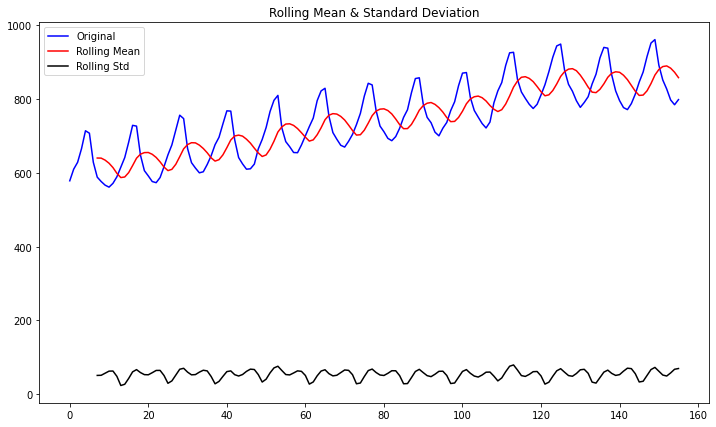

Results of Dickey-Fuller Test:
p-value = 0.6831. The series is likely non-stationary.
Test Statistic                  -1.177724
p-value                          0.683104
#Lags Used                      12.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [29]:
test_stationarity(df["Pounds"])

## Results of  Dickey-Fuller test :-
### 1. Test Statistic is not smaller among all critical values which suggests that the time series is not stationary. 
### 2. The time series is not considered stationary using a 1% Critical Value and we can see visually that there is an upwards trend.

### As per observations S  = 12 and D = 1. So, Transforming timeseries accordingly.

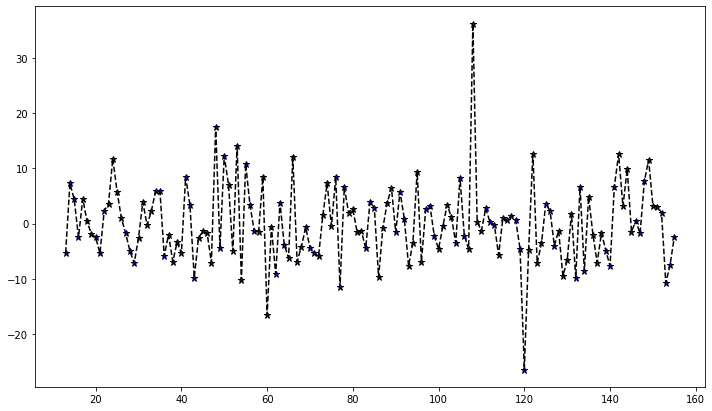

In [90]:
# Seasonality s = 12
df['diff_Pounds'] = df["Pounds"].diff(12)

# D = 1
df['diff_Pounds'] = df['diff_Pounds'].diff(1)
plt.figure(figsize=(12, 7))
plt.plot(df['diff_Pounds'], color='black', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=7)

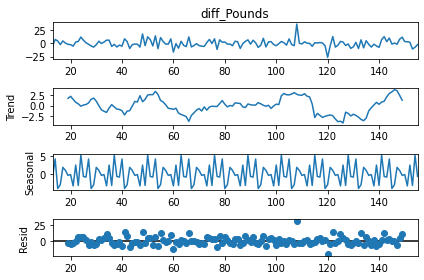

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df['diff_Pounds'][13:], model='additive', period=13).plot()

### Now, timeseries looks as stationary. So, Let's have a  Confirmation of Stationarity Test ( Ad Fuller test )

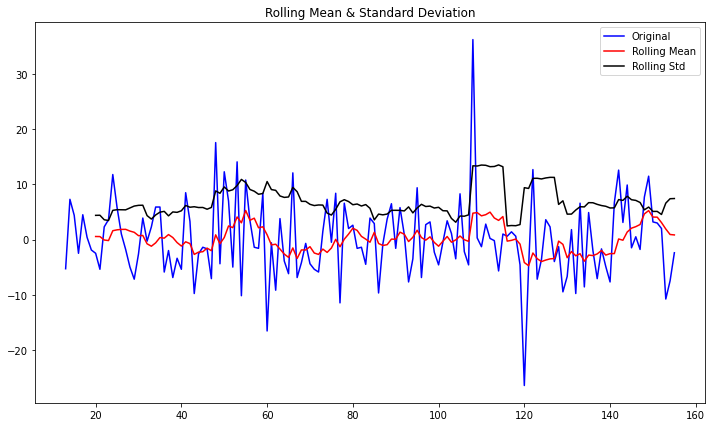

Results of Dickey-Fuller Test:
p-value = 0.0001. The series is likely stationary.
Test Statistic                  -4.708718
p-value                          0.000081
#Lags Used                      11.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [70]:
test_stationarity(df['diff_Pounds'][13:])

## Results of  Dickey-Fuller test :-
### 1. Test Statistic is smaller among all critical values which suggests that the time series is stationary. 
### 2. The time series is considered stationary using a 1% Critical Value.

In [71]:
# Plot acf and pacf for milk production data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_and_pacf(data):
    lags = 50
    plt.figure(figsize=(12,7))
    plt.title('ACF of Milt Production Data ')
    plot_acf(data, ax=plt.gca(), lags = 25)
    
    plt.figure(figsize=(12,7))
    plt.title('PACF of Milt Production Data')    
    plot_pacf(data, ax=plt.gca(), method='ywm', lags = 25) 

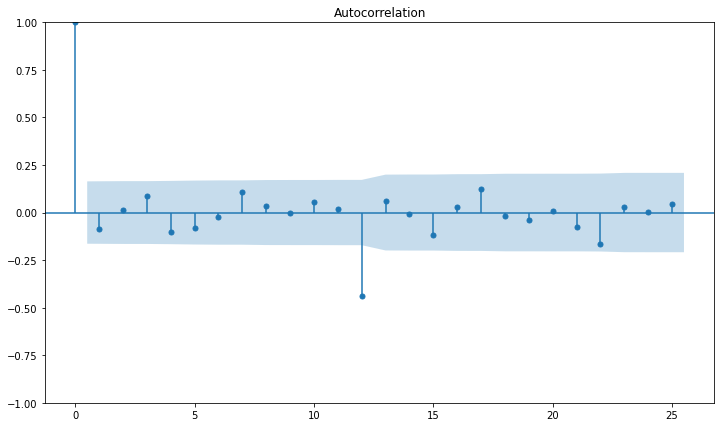

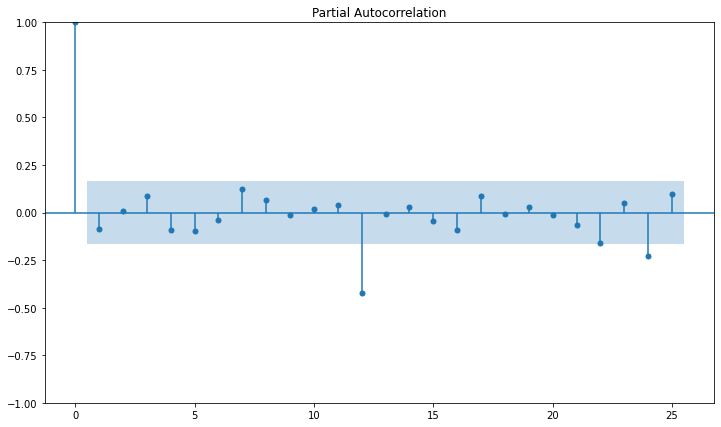

In [72]:
plot_acf_and_pacf(df['diff_Pounds'][13:])

In [77]:
p = 1 
q = 1
d = 1

#Seasonality orders
P = 3 
Q = 3
D = 1
S = 12
ns_orders = [(x,d,y) for x in range(0,p+1) for y in range(0,q+1)]
seasonal_orders = [(x,D,y,S) for x in range(1,P+1) for y in range(1,Q+1)]

count = 1
for s_order in seasonal_orders:
    for ns_order in ns_orders:
        print(count, s_order, ns_order)
        count += 1

1 (1, 1, 1, 12) (0, 1, 0)
2 (1, 1, 1, 12) (0, 1, 1)
3 (1, 1, 1, 12) (1, 1, 0)
4 (1, 1, 1, 12) (1, 1, 1)
5 (1, 1, 2, 12) (0, 1, 0)
6 (1, 1, 2, 12) (0, 1, 1)
7 (1, 1, 2, 12) (1, 1, 0)
8 (1, 1, 2, 12) (1, 1, 1)
9 (1, 1, 3, 12) (0, 1, 0)
10 (1, 1, 3, 12) (0, 1, 1)
11 (1, 1, 3, 12) (1, 1, 0)
12 (1, 1, 3, 12) (1, 1, 1)
13 (2, 1, 1, 12) (0, 1, 0)
14 (2, 1, 1, 12) (0, 1, 1)
15 (2, 1, 1, 12) (1, 1, 0)
16 (2, 1, 1, 12) (1, 1, 1)
17 (2, 1, 2, 12) (0, 1, 0)
18 (2, 1, 2, 12) (0, 1, 1)
19 (2, 1, 2, 12) (1, 1, 0)
20 (2, 1, 2, 12) (1, 1, 1)
21 (2, 1, 3, 12) (0, 1, 0)
22 (2, 1, 3, 12) (0, 1, 1)
23 (2, 1, 3, 12) (1, 1, 0)
24 (2, 1, 3, 12) (1, 1, 1)
25 (3, 1, 1, 12) (0, 1, 0)
26 (3, 1, 1, 12) (0, 1, 1)
27 (3, 1, 1, 12) (1, 1, 0)
28 (3, 1, 1, 12) (1, 1, 1)
29 (3, 1, 2, 12) (0, 1, 0)
30 (3, 1, 2, 12) (0, 1, 1)
31 (3, 1, 2, 12) (1, 1, 0)
32 (3, 1, 2, 12) (1, 1, 1)
33 (3, 1, 3, 12) (0, 1, 0)
34 (3, 1, 3, 12) (0, 1, 1)
35 (3, 1, 3, 12) (1, 1, 0)
36 (3, 1, 3, 12) (1, 1, 1)


In [80]:
fitted_models = []
for s_order in seasonal_orders:
    for ns_order in ns_orders : 
        fitted_models.append(SARIMAX(df['diff_Pounds'][13:], order = ns_order , seasonal_order = s_order))

In [81]:
sarima_res = []
for model in fitted_models:
    sarima_res.append(model.fit())    

c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warning

In [83]:
count = 1
for model in sarima_res:
    print(count, " AIC : ", model.aic)
    count += 1

1  AIC :  1003.9460146921455
2  AIC :  912.0254280678133
3  AIC :  956.1991729286558
4  AIC :  912.9671353661527
5  AIC :  995.123667268081
6  AIC :  903.9505691125233
7  AIC :  950.4854795038839
8  AIC :  904.7599931454906
9  AIC :  994.9594065314258
10  AIC :  904.0878689494804
11  AIC :  950.5823554476717
12  AIC :  904.9865701314843
13  AIC :  999.1656359309152
14  AIC :  909.2504479116047
15  AIC :  954.4382931328198
16  AIC :  910.4876339449058
17  AIC :  998.778088848187
18  AIC :  908.5527117932329
19  AIC :  952.462548751347
20  AIC :  909.7044751374558
21  AIC :  996.9498725967817
22  AIC :  906.0665798030534
23  AIC :  952.5643188337501
24  AIC :  906.9756896078225
25  AIC :  1001.0239012466361
26  AIC :  910.7567515085943
27  AIC :  956.1631975613005
28  AIC :  911.8792984472019
29  AIC :  1000.4897023526294
30  AIC :  910.0995092322778
31  AIC :  954.3571872448979
32  AIC :  911.2563654145417
33  AIC :  1002.1496553102493
34  AIC :  912.5583270489064
35  AIC :  956.4090179

In [85]:
print(ns_orders[1], seasonal_orders[1])

(0, 1, 1) (1, 1, 2, 12)


In [87]:
print(sarima_res[5].summary())

                                        SARIMAX Results                                        
Dep. Variable:                             diff_Pounds   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -446.975
Date:                                 Wed, 06 Apr 2022   AIC                            903.951
Time:                                         17:35:06   BIC                            918.288
Sample:                                              0   HQIC                           909.776
                                                 - 143                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      8.701     -0.115      0.909     -18.053      16

### So, Based on AIC values the parameters of the best fitted model is (p = 0, d = 1, q = 1) which are Non - seasonal orders and (P = 1, D = 1, Q = 2, S = 12) which are Non - seasonal orders.

## So, The final equation of Sarima is :- 

### <center>$\phi_{1}*(B^{12})* \phi_{0}(B) * (1 - B^{12}) *(1 - B)^{1} * X_{t} = \mathbb{Q}_{2}(B^{12}) * \mathbb{Q}_{1}(B) * Z_{t}$</center>

*******************************************************************************************************************************

*******************************************************************************************************************************

*******************************************************************************************************************************

*******************************************************************************************************************************

# Q3

# $ GARCH(2, 2) Simulation $ 

<center>
 $E_{t} = w_{t}\sqrt{\alpha_{0} + \alpha_{1}E_{t-1}^{2} + \alpha_{2}E_{t-2}^{2} + \beta_{1}\sigma_{t-1}^{2} + \beta_{1}\sigma_{t-2}^{2}}$ 
</center>
<center>
$ E_{0}, E_{1} \sim \mathcal{N}(0, 1)$
</center>
<center>
$ \sigma_{0} = 1, \sigma_{1} = 1 $
</center>
<center>
$ w_{t} \sim \mathcal{N}(0, 1)$
    
</center>

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from random import gauss
from arch import arch_model

In [96]:
# create dataset
n = 1000
alpha_0 = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

Et = [gauss(0,1), gauss(0,1)]
sigma = [1, 1]

for _ in range(n):
    new_sigma = np.sqrt(alpha_0 + alpha_1*Et[-1]**2 + alpha_2*Et[-2]**2 + beta_1*sigma[-1]**2 + beta_2*sigma[-2]**2)
    new_val = gauss(0,1) * new_sigma
    
    sigma.append(new_sigma)
    Et.append(new_val)

Text(0.5, 1.0, 'GARCH(2, 2) Simulation')

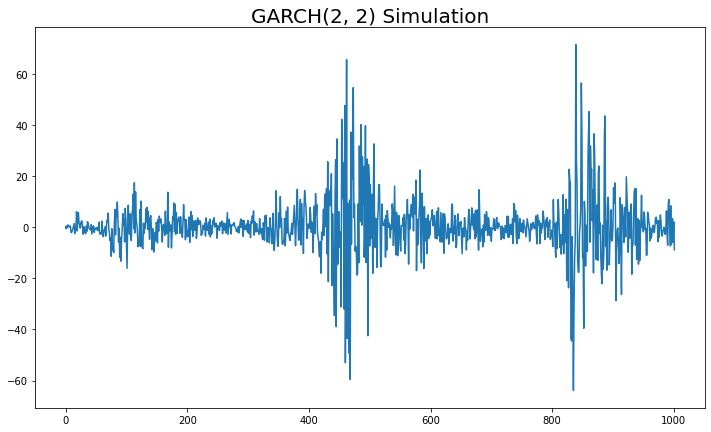

In [106]:
plt.figure(figsize = (12, 7))
plt.plot(Et)
plt.title('GARCH(2, 2) Simulation', fontsize=20)

Text(0.5, 1.0, 'Volatility')

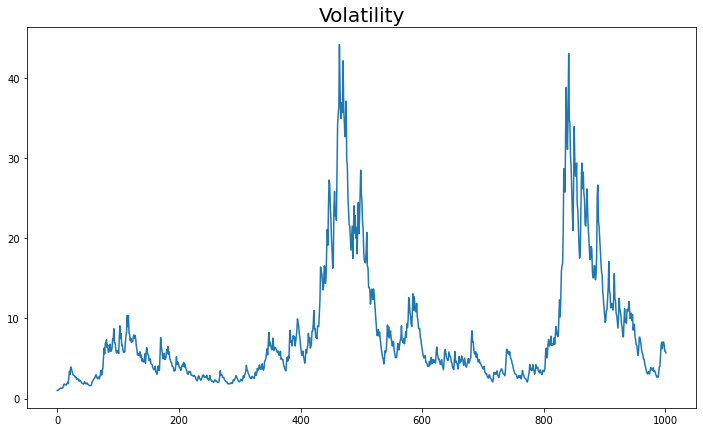

In [107]:
plt.figure(figsize = (12, 7))
plt.plot(sigma)
plt.title('Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

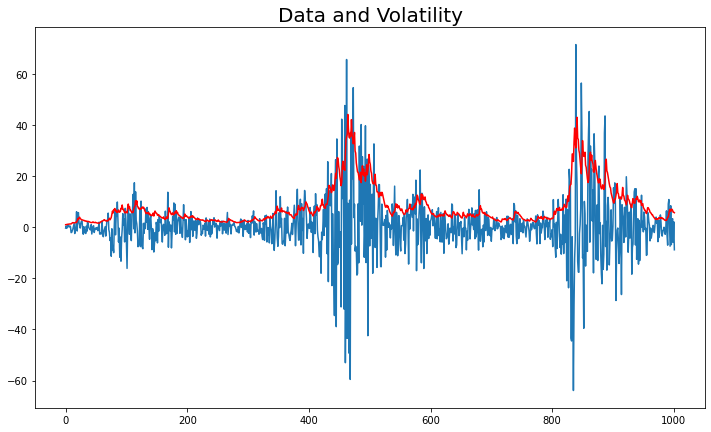

In [108]:
plt.figure(figsize = (12, 7))
plt.plot(Et)
plt.plot(sigma, color='red')
plt.title('Data and Volatility', fontsize=20)

In [109]:
# Plot acf and pacf for milk production data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_and_pacf(data):
    lags = 50
    plt.figure(figsize = (12, 7))
    plt.title('ACF of Milt Production Data ')
    plot_acf(data, ax=plt.gca(), lags = 25)
    
    plt.figure(figsize = (12, 7))
    plt.title('PACF of Milt Production Data')    
    plot_pacf(data, ax=plt.gca(), method='ywm', lags = 25) 

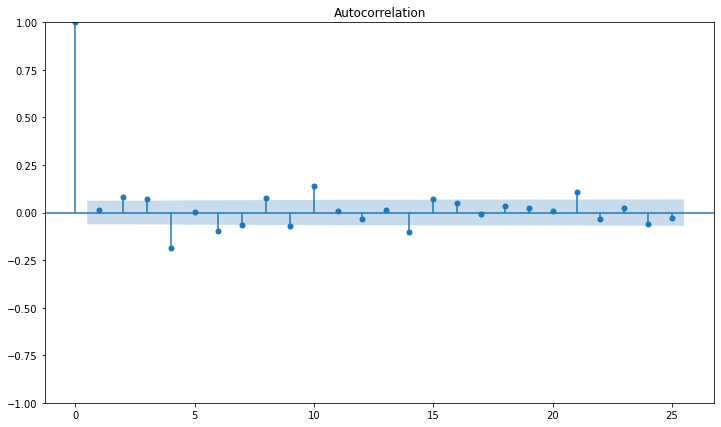

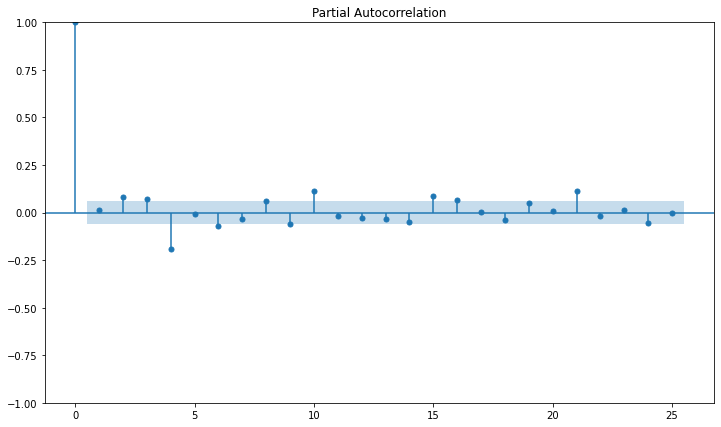

In [101]:
plot_acf_and_pacf(Et)

In [102]:
model = arch_model(Et, p=2, q=2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 11676290787.313349
Iteration:      2,   Func. Count:     17,   Neg. LLF: 134189.45497732505
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3357.2368691400434
Iteration:      4,   Func. Count:     33,   Neg. LLF: 3431.5625769819217
Iteration:      5,   Func. Count:     41,   Neg. LLF: 3241.113910249579
Iteration:      6,   Func. Count:     49,   Neg. LLF: 3293.449676472649
Iteration:      7,   Func. Count:     57,   Neg. LLF: 3242.886228994666
Iteration:      8,   Func. Count:     65,   Neg. LLF: 3229.24083585758
Iteration:      9,   Func. Count:     72,   Neg. LLF: 3227.9853894889316
Iteration:     10,   Func. Count:     79,   Neg. LLF: 3227.944226620597
Iteration:     11,   Func. Count:     86,   Neg. LLF: 3227.931063462127
Iteration:     12,   Func. Count:     93,   Neg. LLF: 3227.930680591642
Iteration:     13,   Func. Count:    100,   Neg. LLF: 3227.9306264214983
Iteration:     14,   Func. Count:    107,   Neg. LLF: 3227.

In [89]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2661.40
Distribution:                  Normal   AIC:                           5334.81
Method:            Maximum Likelihood   BIC:                           5364.27
                                        No. Observations:                 1002
Date:                Wed, Apr 06 2022   Df Residuals:                     1001
Time:                        17:40:12   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0440  8.846e-02      0.498      0.619 [ -0.129,  0.21